# Airline satisfaction prediction

# Introduction

An airline company, Invistico Airlines, wants to predict customer satisfaction of future customers based on services offered. The airline has collected data from the current customers and wants to use the data for the prediction. Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

# Dataset

This data given by an airline organization. The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated. The dataset is obtained from a third party at [Kaggle](https://www.kaggle.com/)

Source of data :- [Airlines Customer satisfaction
](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction)

LICENSE :- [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/)

In [1277]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

data = pd.read_csv("./data/Invistico_Airline.csv")

# Data exploration

In [1278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

The dataset has 129880 rows and 23 columns.

In [1279]:
data.head(7)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0


# Data preprocessing

## Handling missing values

In [1280]:
def fill_null_values(data, column, value_to_fill):
    data = data.copy()
    data[column] = data[column].fillna(value_to_fill)
    return data

In [1281]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

`Arrival Delay in Minutes` contains 393 missing values.

Since there are only 393 missing values out of 129889 it's safe to replace null values in `Arrival Delay in Minutes` with mean value in `Arrival Delay in Minutes`.

In [1282]:
arrival_delay_mean = data["Arrival Delay in Minutes"].mean()

In [1283]:
data = fill_null_values(data, ["Arrival Delay in Minutes"], arrival_delay_mean)

In [1284]:
data.isna().sum().sum()

0

So now all columns are non-null.

## Binary encoding

In [1285]:
def binary_encode(data, column, replace_with):
    data = data.copy()
    data[column] = data[column].replace(replace_with)
    return data

Let's find columns that contain only binary values.

In [1286]:
for column in data.columns:
    if (len(data[column].unique()) == 2):
        print(column, ": ", data[column].unique())

satisfaction :  ['satisfied' 'dissatisfied']
Gender :  ['Female' 'Male']
Customer Type :  ['Loyal Customer' 'disloyal Customer']
Type of Travel :  ['Personal Travel' 'Business travel']


Let's binary encode these columns.

In [1287]:
data = binary_encode(data, "satisfaction", {"satisfied": 1, "dissatisfied": 0})
data = binary_encode(data, "Gender", {"Female": 1, "Male": 0})
data = binary_encode(data, "Customer Type", {"Loyal Customer": 1, "disloyal Customer": 0})
data = binary_encode(data, "Type of Travel", {"Personal Travel": 1, "Business travel": 0})

In [1288]:
data.head(7)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,65,1,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,1,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,1,1,15,1,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,1,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,1,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,1,0,1,30,1,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,1,1,1,66,1,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0


## One hot encoding

In [1289]:
def one_hot_encode(data, column):
    data = data.copy()
    column_one_hot = pd.get_dummies(data[column], prefix=column, dtype="int")
    data = pd.concat([data, column_one_hot], axis=1)
    data = data.drop(column, axis=1)
    return data

One hot encoding the `Class` column.

In [1290]:
data = one_hot_encode(data, "Class")

In [1291]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,1,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,0
1,1,0,1,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,0
2,1,1,1,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,0
3,1,1,1,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,0
4,1,1,1,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,0


Check if the dataset still contains any non-integer column.

In [1292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

## Outliers removal

In [1293]:
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers(data, columns, min_threshold_perc, max_threshold_perc):
    data = data.copy()
    prev_len = len(data)
    for column in columns:
        min_threshold_val = data[column].quantile(min_threshold_perc)
        data = data[~(data[column] < min_threshold_val)]
        max_threshold_val = data[column].quantile(max_threshold_perc)
        data = data[~(data[column] > max_threshold_val)]
    new_len = len(data)
    print("Rows removed: ", prev_len-new_len)
    non_binary_cols = [column for column in data.columns if len(data[column].unique()) > 2]

    fig, ax = plt.subplots(6, 3, figsize=(20, 25))

    fig.suptitle("Boxplots after removing outliers", fontsize=15)

    i = 0
    j = 0
    for  column in non_binary_cols:
        sns.boxplot(y=data[column], ax=ax[i, j], color="skyblue")
        j = j+1
        if j > 2:
            j = 0
            i = i+1
    return data

Boxplots can help in finding outliers.

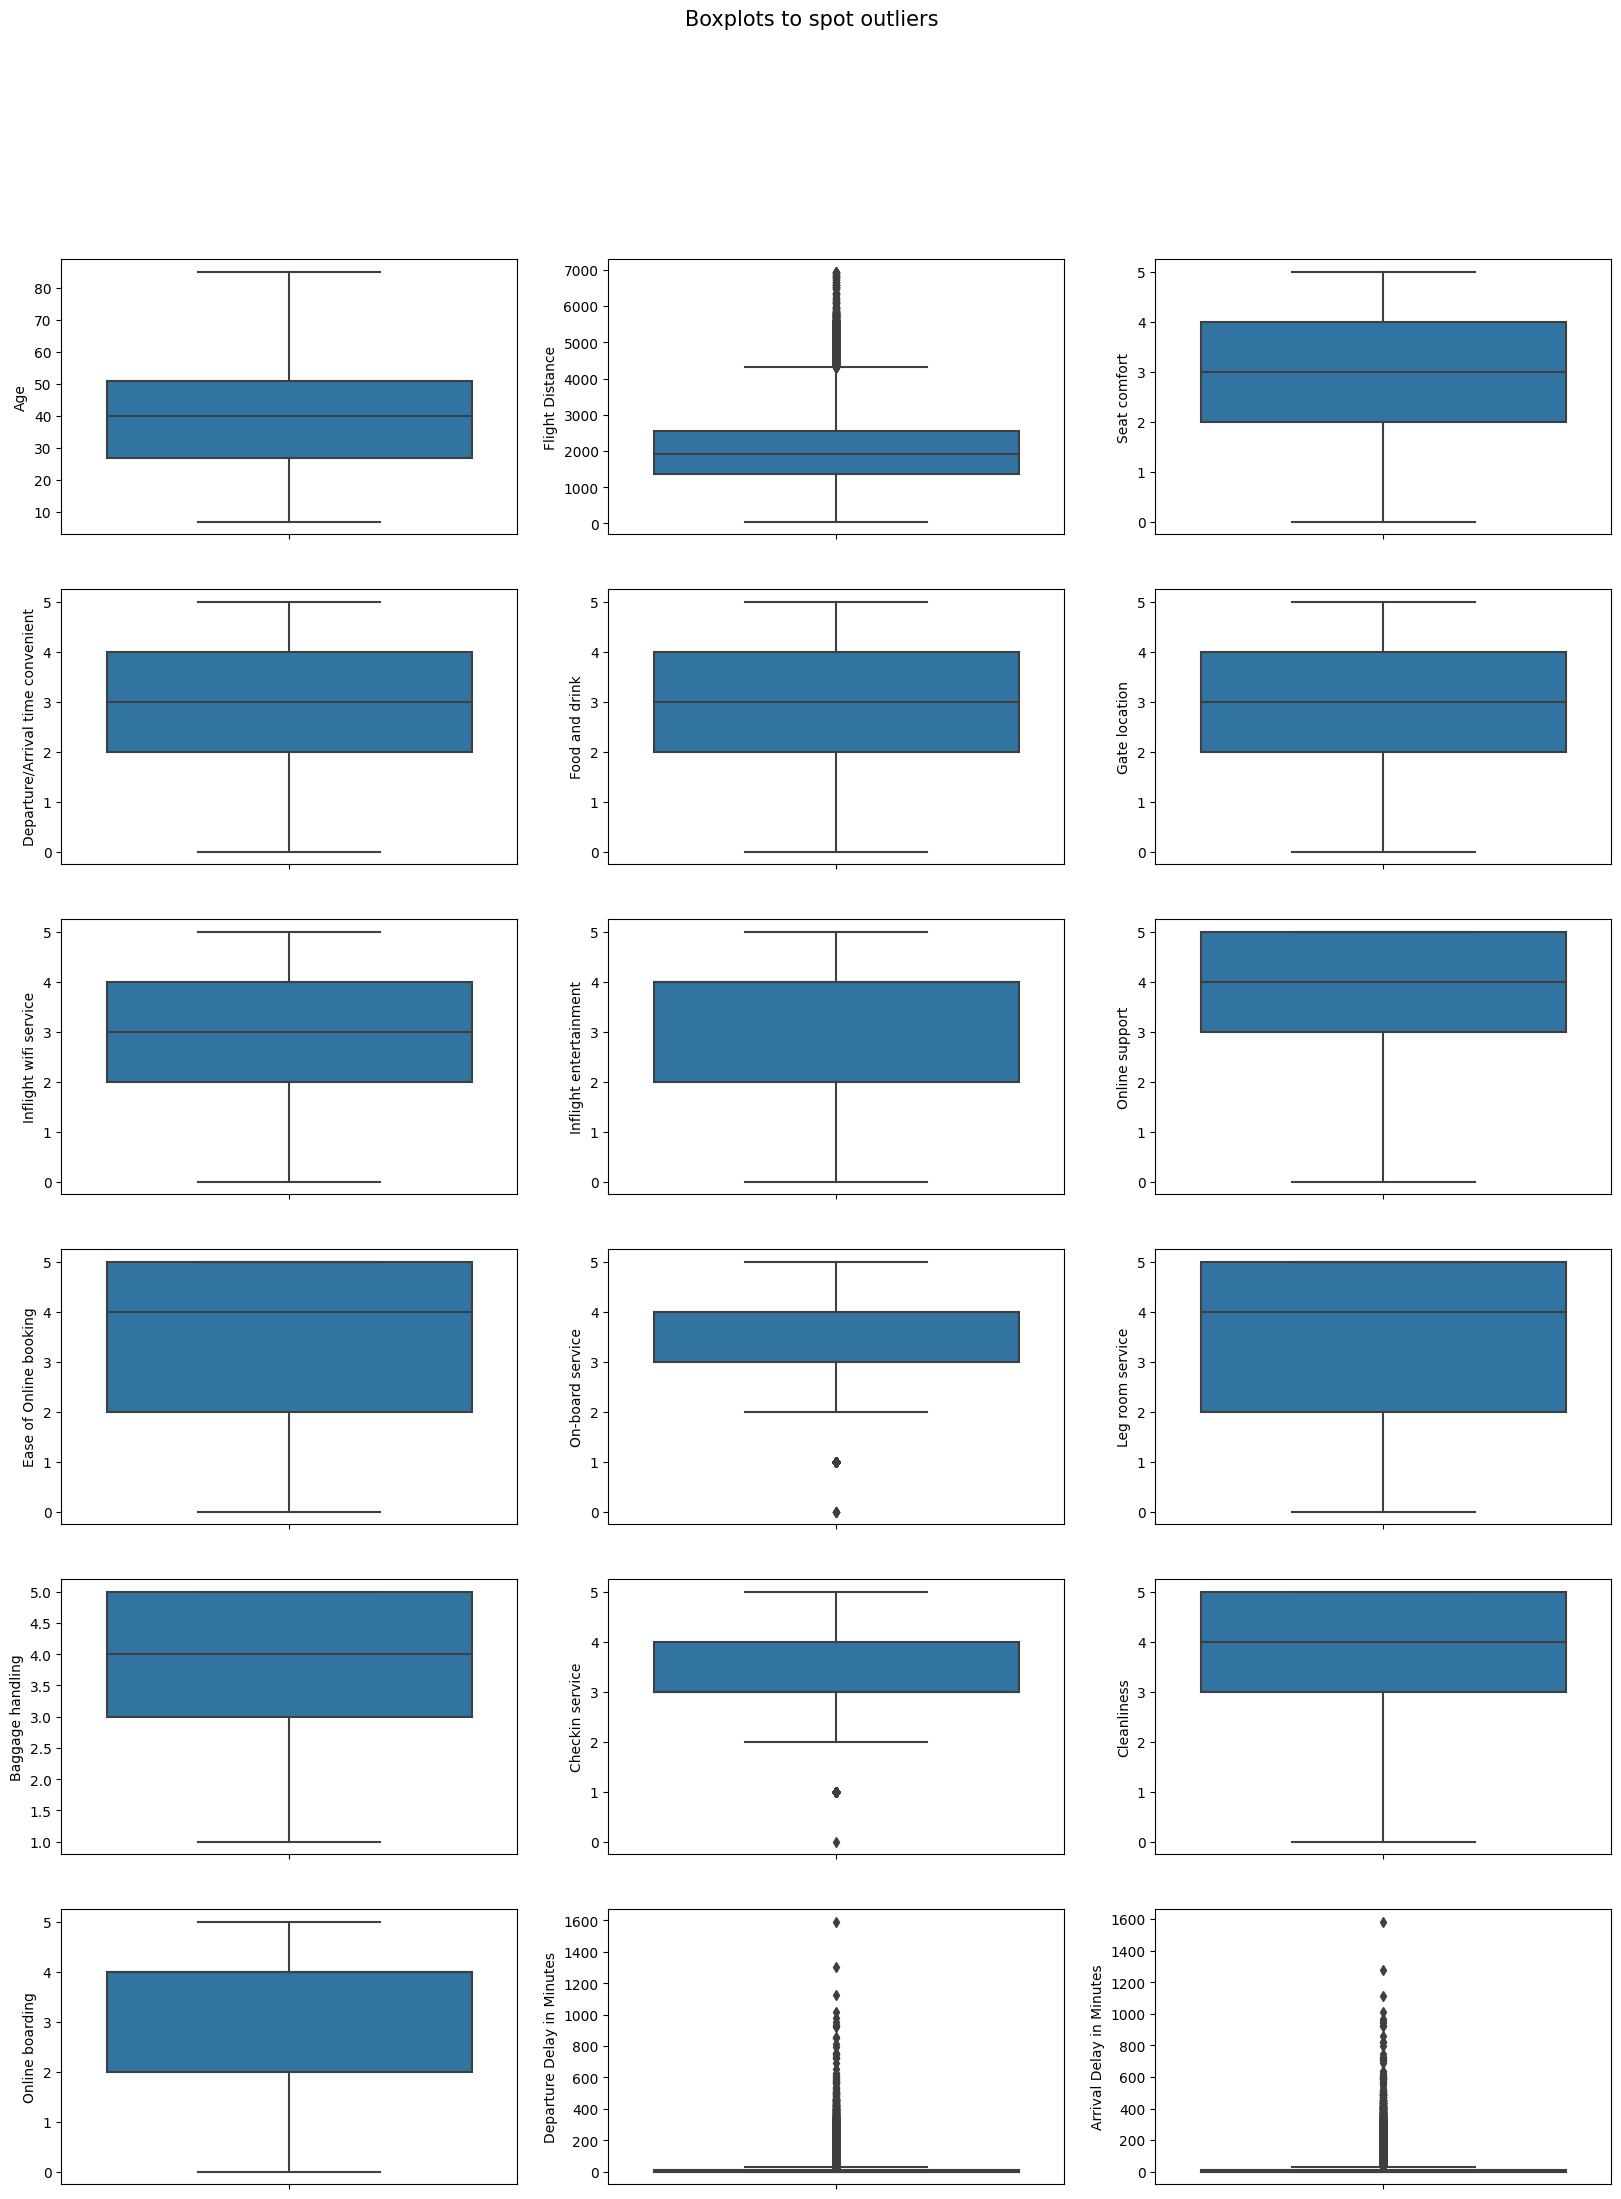

In [1294]:
import matplotlib.pyplot as plt
import seaborn as sns

non_binary_cols = [column for column in data.columns if len(data[column].unique()) > 2]

fig, ax = plt.subplots(6, 3, figsize=(20, 25))

fig.suptitle("Boxplots to spot outliers", fontsize=15)

i = 0
j = 0
for  column in non_binary_cols:
    sns.boxplot(y=data[column], ax=ax[i, j])
    j = j+1
    if j > 2:
        j = 0
        i = i+1
        


The lowest possible value for `Departure Delay in Minutes` is 0 (no delay). So there is no outliers in the lower end of `Departure Delay in Minutes`. But in the upper end of `Departure Delay in Minutes` we can see the value of more than 1600 minutes (more than 26 hours). These values are clearly abnormal and can reduce the efficiency of the model. Same is the case with `Arrival Delay in Minutes`.

Rows removed:  6276


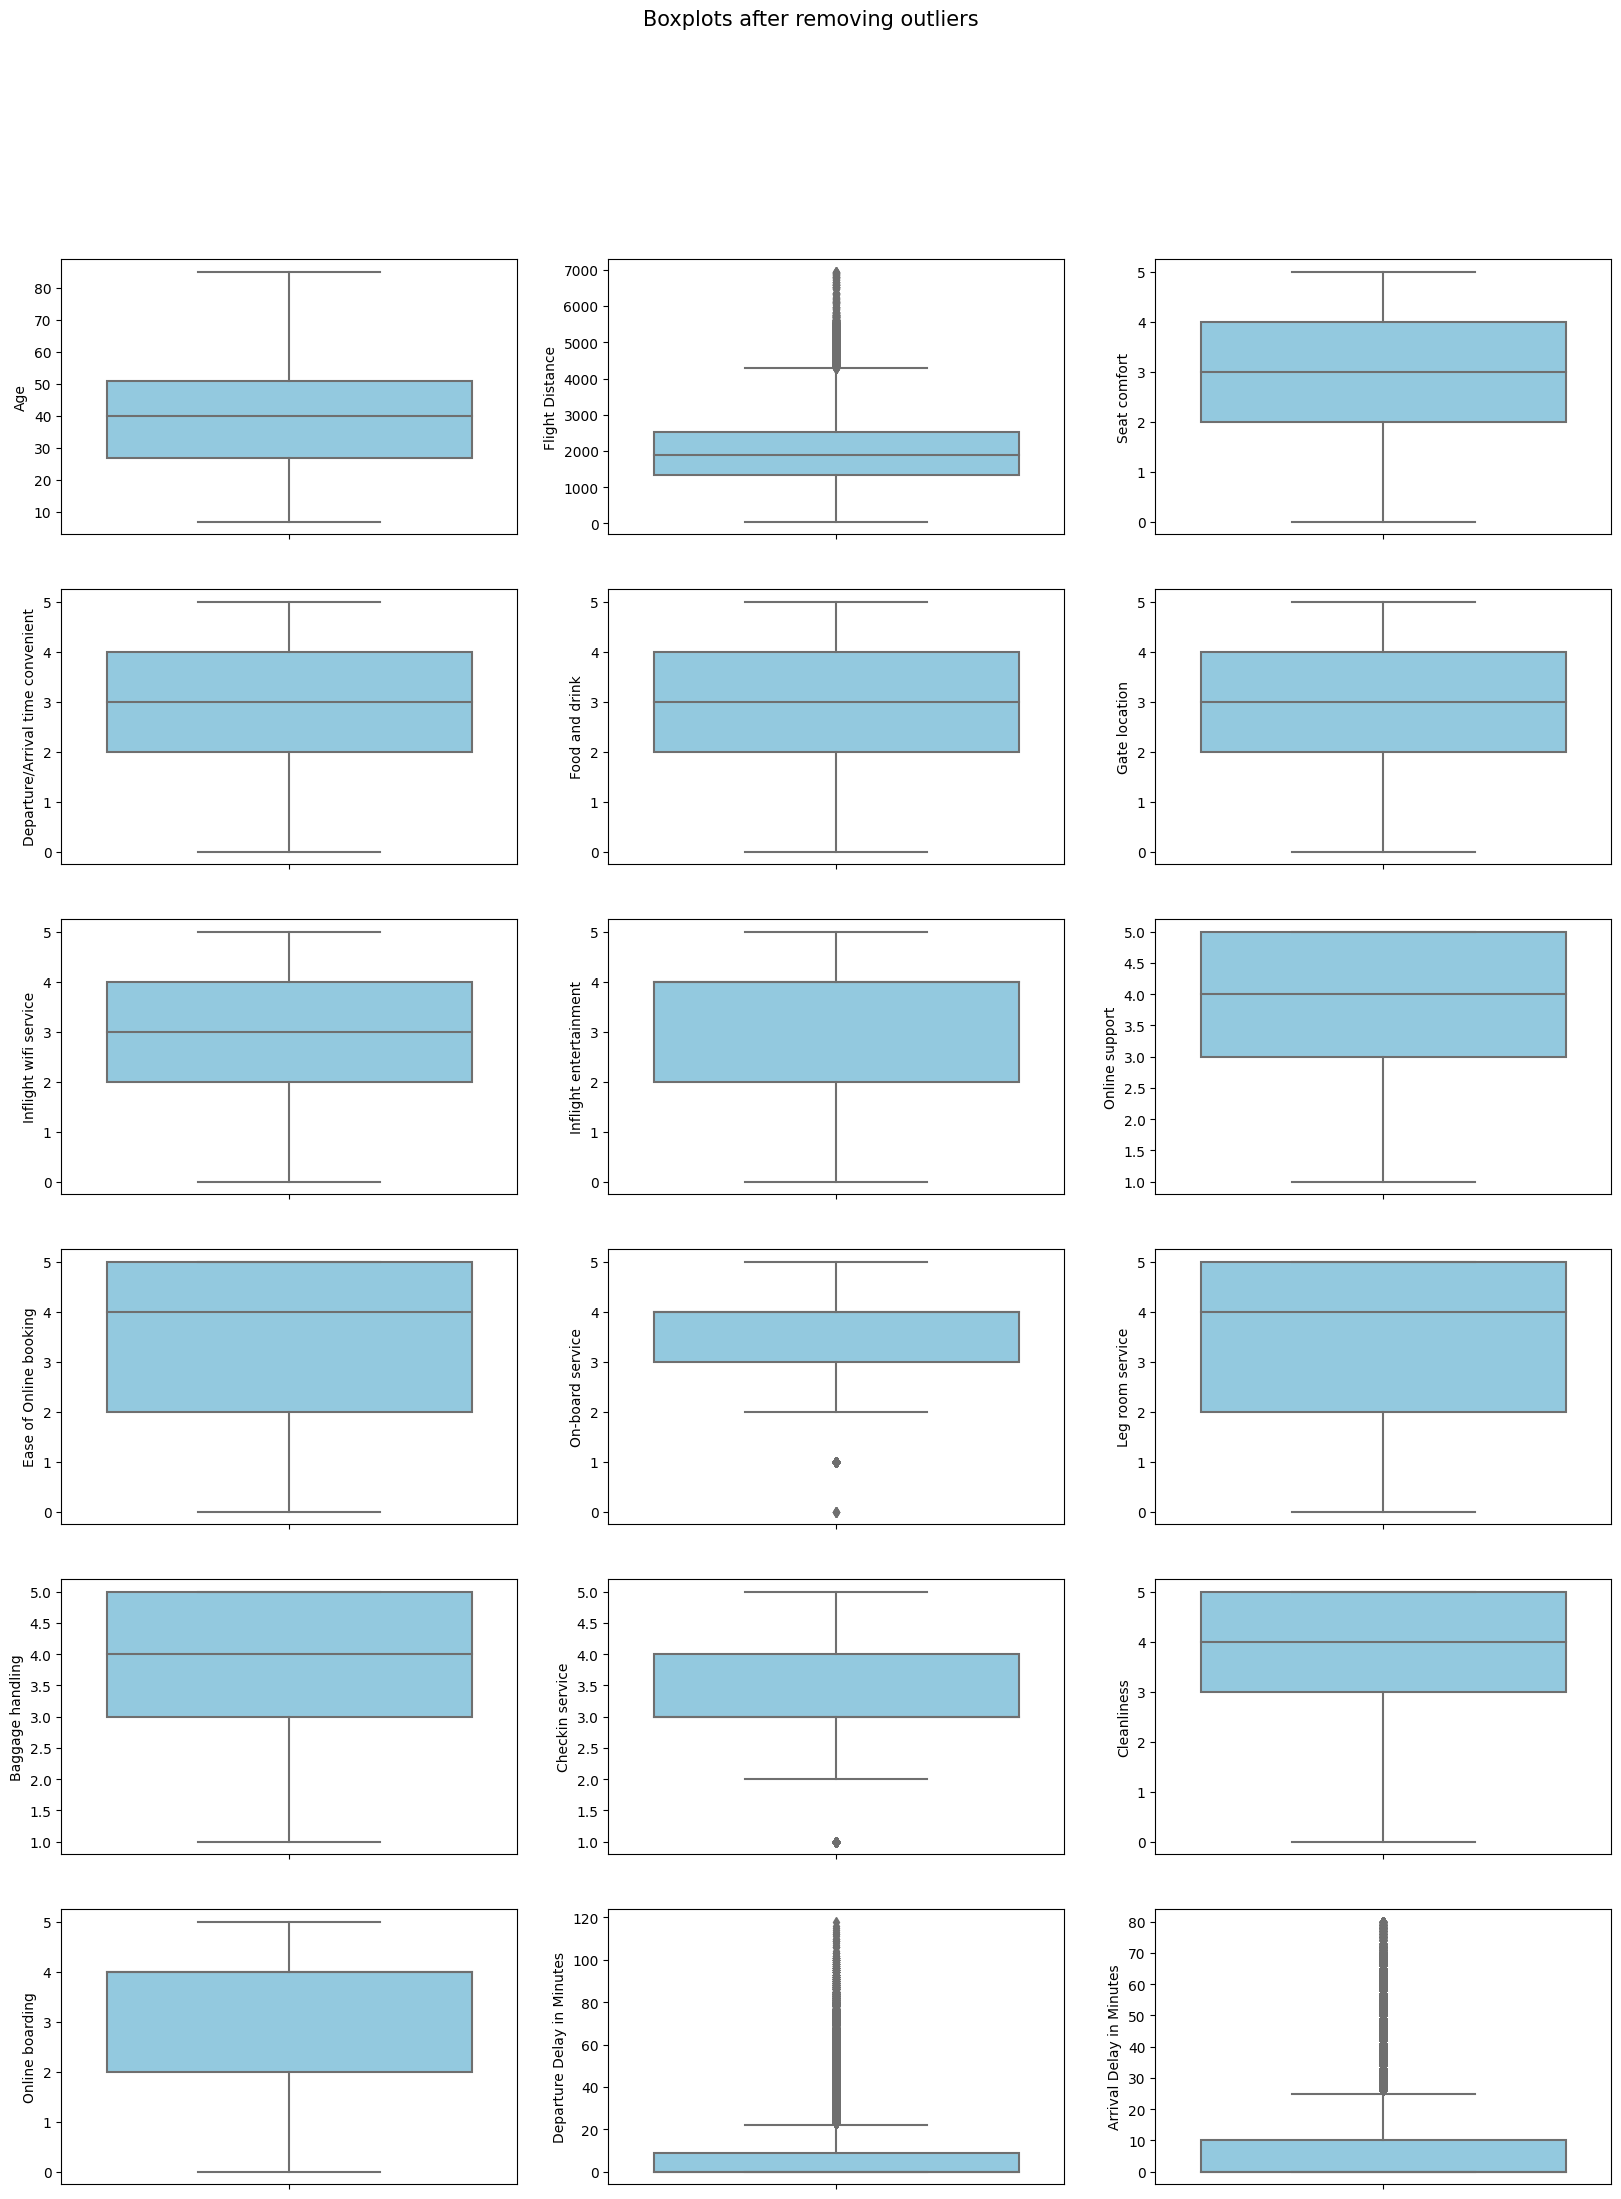

In [1295]:
data = remove_outliers(data, ["Departure Delay in Minutes", "Arrival Delay in Minutes"], 0, 0.975)

# Model

## Train test split

In [1296]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "satisfaction"]
Y = data.loc[:, "satisfaction"]
X = X.reset_index()
Y = Y.reset_index()
X = X.drop("index", axis=1)
Y = Y.drop("index", axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=2)


In [1297]:
X_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
27355,1,1,42,1,787,3,3,3,3,3,5,5,5,5,5,5,3,5,5,0,0.0,1,0,0
53605,1,0,25,0,1263,3,5,3,2,5,3,1,5,4,3,5,5,5,5,0,0.0,1,0,0
25318,1,1,66,1,340,3,3,5,3,5,5,5,5,1,5,5,1,4,5,0,23.0,0,1,0


In [1298]:
X_test.head(3)

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
76951,1,1,52,0,224,3,2,5,2,3,3,3,3,3,3,3,2,3,3,0,0.0,1,0,0
106537,1,1,57,0,2241,1,1,1,1,4,4,5,4,4,5,4,3,4,3,0,0.0,1,0,0
53044,1,0,39,0,2139,3,4,3,3,4,3,4,4,2,5,4,1,4,4,29,7.0,0,1,0


In [1299]:
Y_train.head(3)

,satisfaction
27355,1
53605,0
25318,1


In [1300]:
Y_test.head(3)

,satisfaction
76951,0
106537,1
53044,0


## Scaling

In [1301]:
from sklearn.preprocessing import StandardScaler

s_scale = StandardScaler()

s_scale.fit(X_train)

X_train_scaled = pd.DataFrame(s_scale.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(s_scale.transform(X_test), columns=X_test.columns)

In [1302]:
X_train_scaled

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0.989287,0.472882,0.169696,1.494270,-1.153024,0.112110,0.004641,0.100168,0.006607,-0.195126,1.196539,1.127980,1.164926,1.202781,1.169416,1.125076,-0.27303,1.116070,1.265661,-0.511077,-0.532564,1.040029,-0.899199,-0.279668
1,0.989287,-2.114691,-0.954869,-0.669223,-0.684348,0.112110,1.314019,0.100168,-0.758373,1.324915,-0.290645,-1.937853,1.164926,0.415046,-0.370459,1.125076,1.31537,1.116070,1.265661,-0.511077,-0.532564,1.040029,-0.899199,-0.279668
2,0.989287,0.472882,1.757317,1.494270,-1.593146,0.112110,0.004641,1.483822,0.006607,1.324915,1.196539,1.127980,1.164926,-1.948160,1.169416,1.125076,-1.86143,0.245535,1.265661,-0.511077,0.928012,-0.961512,1.112100,-0.279668
3,0.989287,-2.114691,-0.690266,-0.669223,0.167342,0.112110,0.004641,0.100168,-0.758373,-1.715166,-0.290645,-1.937853,-1.899958,-0.372689,-1.910334,-0.601457,-1.86143,-0.625000,-1.817327,-0.511077,-0.532564,-0.961512,1.112100,-0.279668
4,0.989287,0.472882,0.368149,-0.669223,-1.665023,-0.604439,-0.650048,-0.591659,-0.758373,-0.195126,-1.034236,-1.171395,-1.133737,-1.160424,-1.140396,-1.464724,-0.27303,-1.495535,0.494914,1.219091,0.801006,-0.961512,-0.899199,3.575674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98878,0.989287,-2.114691,1.095808,-0.669223,-0.082750,-0.604439,-0.650048,-0.591659,0.006607,-0.955146,-1.034236,-1.171395,-1.133737,-1.160424,1.169416,0.261809,0.52117,0.245535,-1.046580,-0.449285,-0.151544,-0.961512,-0.899199,3.575674
98879,-1.010829,0.472882,0.235847,-0.669223,1.980999,0.112110,0.004641,0.100168,0.006607,-0.955146,0.452947,1.127980,0.398705,0.415046,0.399479,0.261809,0.52117,0.245535,0.494914,-0.511077,-0.532564,1.040029,-0.899199,-0.279668
98880,-1.010829,0.472882,-0.557964,-0.669223,-0.345642,-0.604439,1.314019,1.483822,1.536567,-0.955146,-1.034236,-1.171395,-1.133737,-0.372689,-0.370459,0.261809,0.52117,-0.625000,-1.046580,4.926593,4.484198,1.040029,-0.899199,-0.279668
98881,-1.010829,0.472882,-0.028757,-0.669223,0.387895,0.828658,0.659330,0.100168,0.771587,-1.715166,-1.777828,-1.937853,0.398705,0.415046,0.399479,0.261809,-1.06723,0.245535,0.494914,-0.511077,-0.532564,1.040029,-0.899199,-0.279668


## Logistics regression

In [1303]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np

lr = LogisticRegression(random_state = 2)
kfold = KFold(n_splits = 4)

train_scores = []
for train_idx, test_idx in kfold.split(X_train_scaled):
    lr.fit(X_train_scaled.iloc[train_idx,:], Y_train.iloc[train_idx, :].values.ravel())
    train_scores.append(lr.score(X_train_scaled.iloc[test_idx,:], Y_train.iloc[test_idx, :].values.ravel()))

print(train_scores)
print("Average score: ", np.array(train_scores).mean())

[0.8383560535577039, 0.8406213340884269, 0.8357267100845435, 0.8353559870550162]
Average score:  0.8375150211964226


So the model has accuracy of around 84% in training. Training the model in the entire train set.

In [1304]:
lr.fit(X_train_scaled, Y_train.values.ravel())

LogisticRegression(random_state=2)

### Evaluating model accuracy in test set

In [1305]:
lr.score(X_test_scaled, Y_test)

0.8337850410582096

The accuracy of the model is around 83%.